In [1]:
figure(1); close(1) # en mi PC me da error al generar las figuras png embedidas en el notebook si no hago esto.

In [2]:
clear
pkg load control % carga de un módulo necesario para el DHR
e4init           % carga del E4
format short g   % formato de presentación para los resultados numéricos


            XXXXXX 4 4      XXXXX  XX     XX  XX  XXXXXX (c)
           XX      444     XX  XX XX     XX  XX  XX
          XXXX       4    XXXXX  XX     XX  XX  XXXXXX
         XX              XX     XX     XX  XX      XX
        XXXXXX          XX     XXXXXX XXXXXX  XXXXXX

    Toolbox for State Space Estimation of Econometric Models
 
*********************** Options set by user ********************
Filter. . . . . . . . . . . . . : KALMAN
Scaled B and M matrices . . . . : NO
Initial state vector. . . . . . : AUTOMATIC SELECTION
Initial covariance of state v.  : IDEJONG
Variance or Cholesky factor?  . : VARIANCE
Optimization algorithm. . . . . : BFGS
Maximum step length . . . . . . : 0.100000
Stop tolerance. . . . . . . . . : 0.000010
Max. number of iterations . . . :       75
Verbose iterations. . . . . . . : YES
****************************************************************
 
 


## Datos
Cargamos los [datos](https://www.metoffice.gov.uk/hadobs/hadcet/data/meantemp_monthly_totals.txt) de temperaturas [(fuente)](https://www.metoffice.gov.uk/hadobs/hadcet/)

In [3]:
load data/Annual.1659.2022.txt

La primera columna son los años, que llamaré `Y` la segunda las temperaturas medias anuales (la última columna de los [datos](https://www.metoffice.gov.uk/hadobs/hadcet/data/meantemp_monthly_totals.txt) originales) que llamaré `T`.
Ejecutando la celda siguiente podemos verlos 

In [4]:
Y=Annual_1659_2022(:,1);
T=Annual_1659_2022(:,2);
%format bank; [Y,T]

Hagamos también un gráfico de la serie histórica de temperaturas

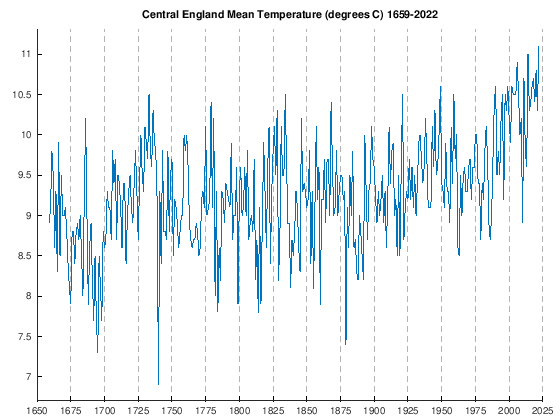

In [5]:
%plot --format png
plot (Y,T)
hold on
axis ([1650 2025 min(T)-0.2 max(T)+0.2])
set (gca(), "xgrid", "on");
set (gca(), "ytick", [7:.5:11]);
set(gca,'GridLineStyle','--')
ylim([min(T)-0.2 max(T)+0.2])
set( gca, 'XTick', 1650:25:2025 );
set( gca, 'GridColor', [.7, .7, .7] );
title('Central England Mean Temperature (degrees C) 1659-2022')
box off;

# Primer modelo. Identificación libre de un modelo para la tendencia

Aquí no indicamos el módelo, y dejamos que el algoritmo que explore con órdenes autorregresivos desde 12 a 20 (en realidad he visto que ampliando el rango a `[1:106]` tampoco cambia el resultado...)

    dhrgraph at line 68 column 3
    autodhr at line 451 column 31


AR  NN R2T
  
15  0  0.7650.0004-S

14  0  0.7580.0013-S
16  0  0.7470.0012-S
19  0  0.7460.0008-S
17  0  0.7460.0014-S
18  0  0.7460.0010-S
20  0  0.7410.0008-S
12  0  0.3150.0145-R
13  0  0.2430.0247-R

VAR =

      0.28129   0.00010994

P =   Inf
TVP =

            1
      0.90586

oar =    15
MCNN =

  20x1 struct array containing the fields:

    P
    TVP
    VAR
    NVR
    proc
    adjust

nada =     0
NVR = 0.00039085


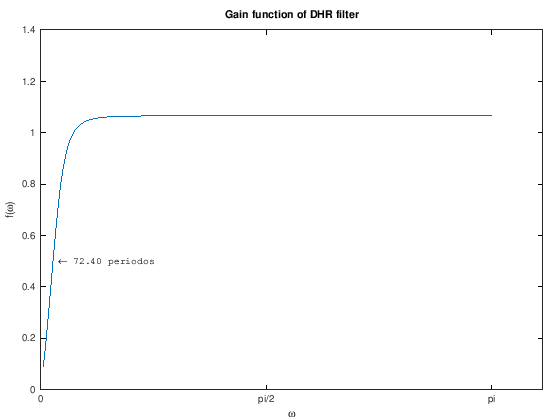

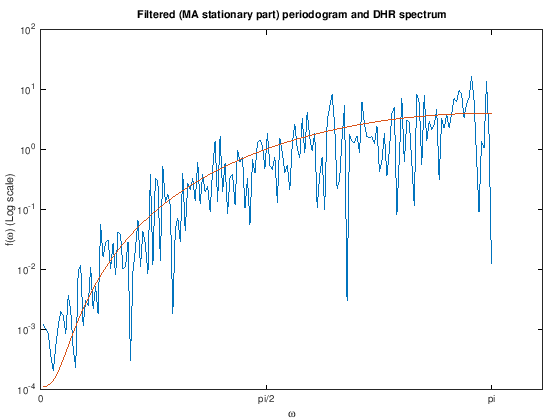

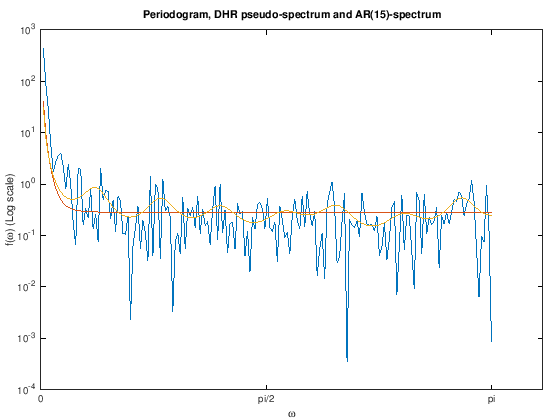

In [6]:
p = 1; % son datos anuales
[VAR, P, TVP, oar, MCNN, nada, NVR] = autodhr(T, p, [], [12:20])

El resultado es un SRW con parámetro `0.9059` y NVR `0.00039085`.

El `NVR` se calcula como el ratio

In [7]:
VAR(2)/VAR(1)

ans = 0.00039085


Todo esto es **muy similar a lo presentado en el año 2008**:  [presentación del 2008 - slide 8](CET2008/Climate01-screen.pdf#slideheading.0.7)

Obtenemos la tendencia filtrando la serie temporal

In [8]:
[tr, se, cy, ir] = dhrfilt(T, P, TVP, VAR, p, 2);

Veamos el gráfico de las temperaturas junto a su tendencia estimada

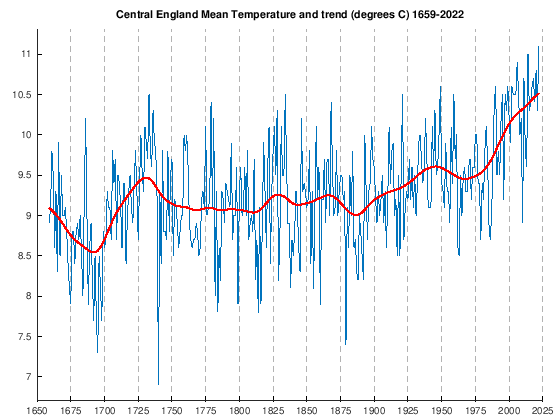

In [9]:
%plot --format png
plot(Y,T)
hold on
plot(Y, tr, '-r', "linewidth", 4)
axis ([1650 2025 min(T)-0.2 max(T)+0.2])
set (gca(), "xgrid", "on");
set (gca(), "ytick", [7:.5:11]);
set(gca,'GridLineStyle','--')
ylim([min(T)-0.2 max(T)+0.2])
set( gca, 'XTick', 1650:25:2025 );
set( gca, 'GridColor', [.7, .7, .7] );
title('Central England Mean Temperature and trend (degrees C) 1659-2022')
box off;


Veamos la primera diferencia de la tandencia estimada

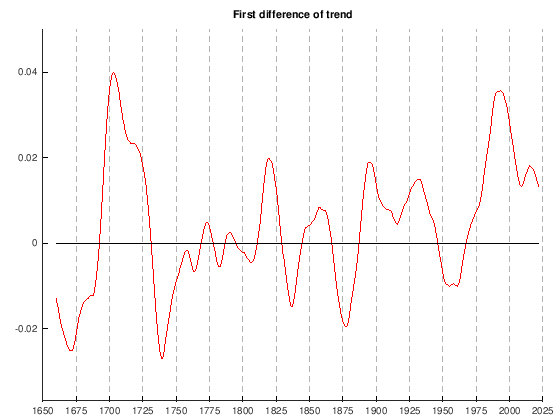

In [10]:
%plot --format png
plot(Y(2:end),diff(tr), '-r')
hold on
plot(Y(2:end),zeros(length(Y)-1), '-k', "linewidth", 1)
axis ([1650 2025])
set (gca(), "xgrid", "on");
set(gca,'GridLineStyle','--')
ylim([min(diff(tr))-0.01 max(diff(tr))+0.01])
set( gca, 'XTick', 1650:25:2025 );
set( gca, 'GridColor', [.7, .7, .7] );
title('First difference of trend')
box off;


Todo esto es **muy similar a lo presentado en el año 2008**, solo cambia la parte final del gráfico 
 ([presentación del 2008 - slide 6](CET2008/Climate01-screen.pdf#slideheading.0.5)), pues ahora tenemos 15 años más de muestra. 

# Segundo modelo. Forzando un IRW para la tendencia

Aquí forzamos la identificación de un módelo IRW. Exploramos con órdenes autorregresivos de 12 a 20 (en realidad ampliando el rango a `[1:106]` no cambia el resultado...)

    dhrgraph at line 68 column 3
    autodhr at line 451 column 31


AR  NN R2T
  
13  0  0.7600.0016-I
15  0  0.7580.0006-I

14  0  0.7570.0012-I

12  0  0.7500.0031-I
16  0  0.7430.0012-I
19  0  0.7420.0008-I
17  0  0.7410.0014-I
18  0  0.7410.0010-I
20  0  0.7370.0007-I

VAR2 =

      0.28241   0.00034371

P2 =   Inf
TVP2 =

            1
            1

oar2 =    14
MCNN2 =

  20x1 struct array containing the fields:

    P
    TVP
    VAR
    NVR
    proc
    adjust

nada =     0
NVR = 0.0012171


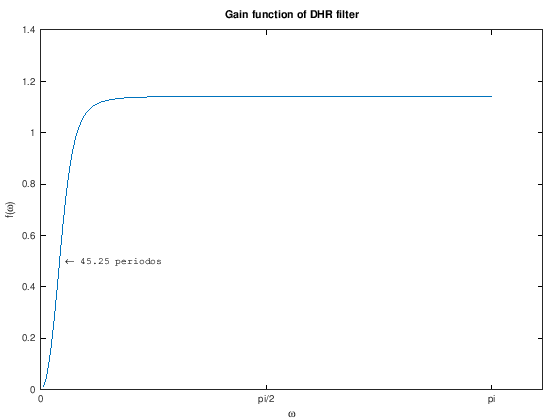

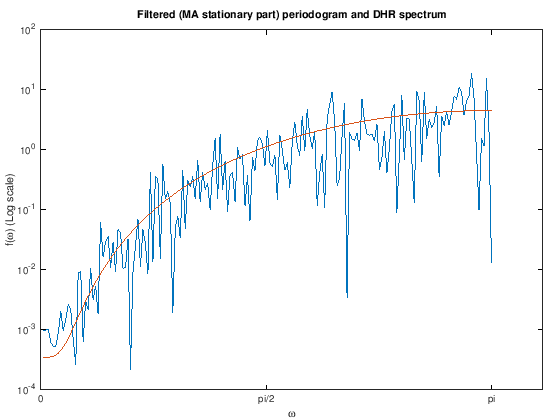

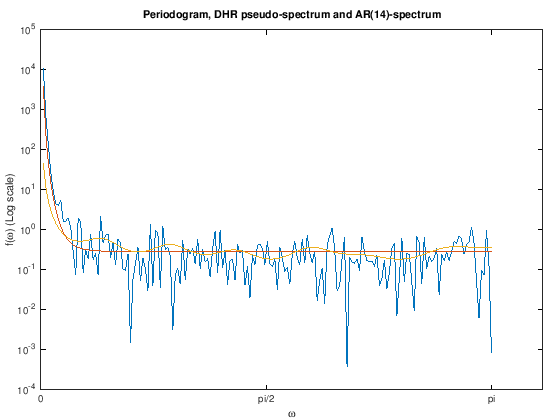

In [11]:
[VAR2, P2, TVP2, oar2, MCNN2, nada, NVR] = autodhr(T,p,[],[12:20],[],[1;1],1)

El `NVR` es ligeramente mayor que el reportado en 2008 para el modelo IRW: [presentación del 2008 - slide 8](CET2008/Climate01-screen.pdf#slideheading.0.7)

In [12]:
VAR2(2)/VAR2(1)

ans = 0.0012171


Obtenemos la tendencia filtrando la serie temporal

In [13]:
[tr2, se2, cy2, ir2] = dhrfilt(T, P2, TVP2, VAR2, p, 2);

Veamos el gráfico de las temperaturas y la tendencia estimada. Voy a pintar ambas (en rojo SRW y en negro IRW)

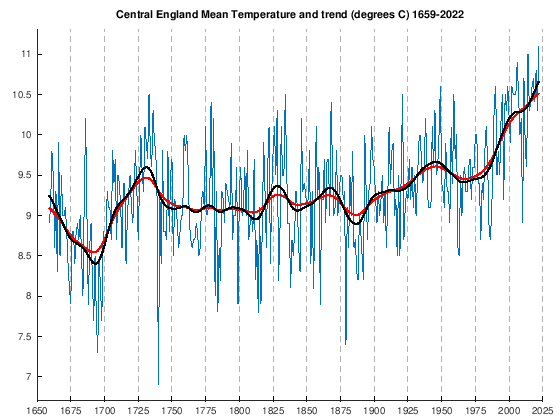

In [14]:
%plot --format png
plot(Y,T)
hold on
plot(Y, tr, '-r', "linewidth", 4)
plot(Y, tr2, '-k', "linewidth", 4)
axis ([1650 2025 min(T)-0.2 max(T)+0.2])
set (gca(), "xgrid", "on");
set (gca(), "ytick", [7:.5:11]);
set(gca,'GridLineStyle','--')
ylim([min(T)-0.2 max(T)+0.2])
set( gca, 'XTick', 1650:25:2025 );
set( gca, 'GridColor', [.7, .7, .7] );
title('Central England Mean Temperature and trend (degrees C) 1659-2022')
box off;


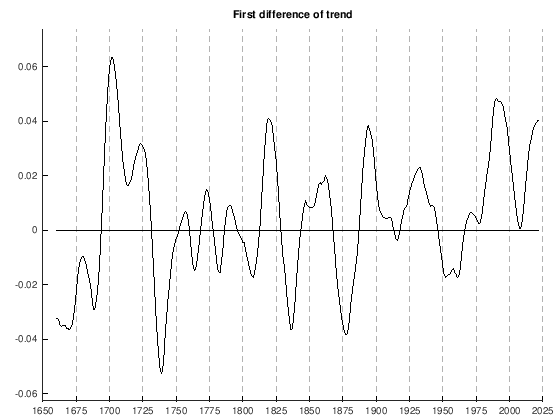

In [15]:
%plot --format png
plot(Y(2:end),diff(tr2), '-k')
hold on
plot(Y(2:end),zeros(length(Y)-1), '-k', "linewidth", 1)
axis ([1650 2025])
set (gca(), "xgrid", "on");
set(gca,'GridLineStyle','--')
ylim([min(diff(tr2))-0.01 max(diff(tr2))+0.01])
set( gca, 'XTick', 1650:25:2025 );
set( gca, 'GridColor', [.7, .7, .7] );
title('First difference of trend')
box off;


# Tercer modelo. Forzando un RW para la tendencia

Aquí pedimos un módelo IRW, explorando con órdenes autorregresivos de 12 a 20

    dhrgraph at line 68 column 3
    autodhr at line 451 column 31


AR  NN R2T
  
12  0  0.3150.0145-R
20  0  0.3070.0037-R

15  0  0.2500.0184-R

14  0  0.2430.0224-R
13  0  0.2430.0247-R
17  0  0.2430.0187-R
18  0  0.2080.0022-R
19  0  0.2010.0220-R
16  0  0.1600.0315-R

VAR3 =

      0.27339     0.005041

P3 =   Inf
TVP3 =

            1
            0

oar3 =    15
MCNN3 =

  20x1 struct array containing the fields:

    P
    TVP
    VAR
    NVR
    proc
    adjust

nada =     0
NVR = 0.018439


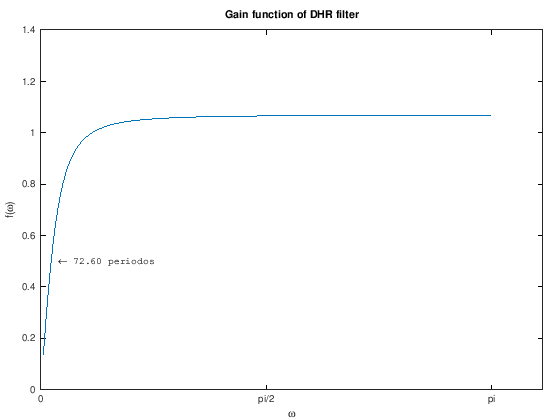

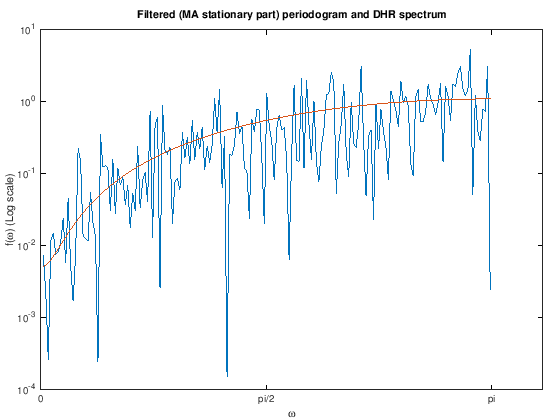

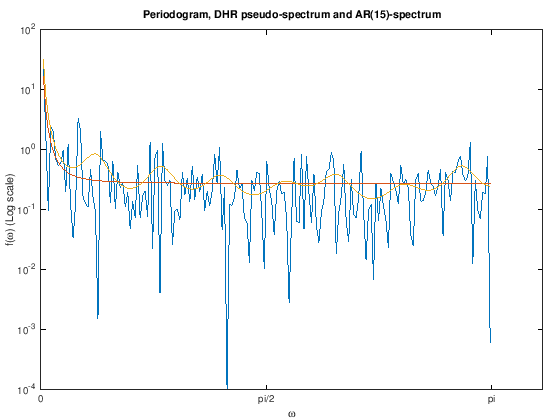

In [16]:
[VAR3, P3, TVP3, oar3, MCNN3, nada, NVR] = autodhr(T,p,[],[12:20],[],[1;0],1)

También aquí el `NVR` es algo mayor que el reportado en 2008 para el modelo RW: [presentación del 2008 - slide 8](CET2008/Climate01-screen.pdf#slideheading.0.7)

In [17]:
VAR3(2)/VAR3(1)

ans = 0.018439


Obtenemos la tendencia filtrando la serie temporal

In [18]:
[tr3, se3, cy3, ir3] = dhrfilt(T, P3, TVP3, VAR3, p, 2);

Veamos el gráfico de las temperaturas y la tendencia estimada

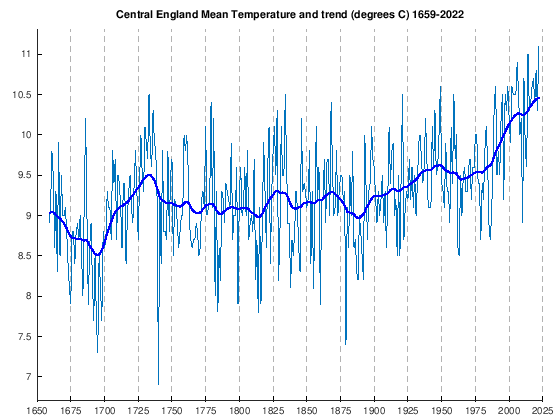

In [19]:
%plot --format png
plot(Y,T)
hold on
plot(Y, tr3, '-b', "linewidth", 4)
axis ([1650 2025 min(T)-0.2 max(T)+0.2])
set (gca(), "xgrid", "on");
set (gca(), "ytick", [7:.5:11]);
set(gca,'GridLineStyle','--')
ylim([min(T)-0.2 max(T)+0.2])
set( gca, 'XTick', 1650:25:2025 );
set( gca, 'GridColor', [.7, .7, .7] );
title('Central England Mean Temperature and trend (degrees C) 1659-2022')
box off;


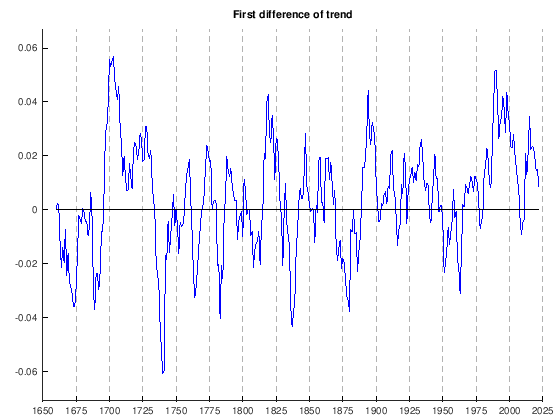

In [20]:
%plot --format png
plot(Y(2:end),diff(tr3), '-b')
hold on
plot(Y(2:end),zeros(length(Y)-1), '-k', "linewidth", 1)
axis ([1650 2025])
set (gca(), "xgrid", "on");
set(gca,'GridLineStyle','--')
ylim([min(diff(tr3))-0.01 max(diff(tr3))+0.01])
set( gca, 'XTick', 1650:25:2025 );
set( gca, 'GridColor', [.7, .7, .7] );
title('First difference of trend')
box off;
